# Progamming Exercise 1: Logistic Regression

The file Data/ex2data1.txt contains the dataset for a logistic regression problem. The first column is the Exam 1 marks, the second cloumn is the Exam 2 marks and the third column is the admission decision. Build a logistic regression model to predict whether a student gets admitted into a university given his both exam marks.
Predict the probability of the student's admission into the university.

In [113]:
# imports
# Scientific and vector computation for python
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
# For Dataframe 
import pandas as pd
# Optimization module in scipy
from scipy import optimize

In [267]:
#Load dataset and initialize variables
path2 = "/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise2/Data/ex2data1.txt"
data = np.loadtxt(path2,delimiter = ',')
X = data[:,0:2]
y = data[:,2]
m = y.shape[0]

Let us visualize the dataset

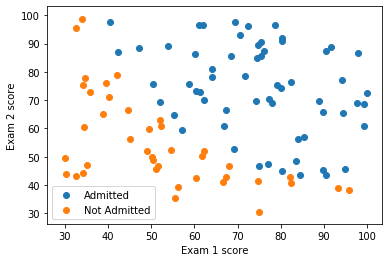

In [67]:
# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0

# Plot Examples
plt.scatter(X[pos, 0], X[pos, 1],label = 'Admitted')
plt.scatter(X[neg, 0], X[neg, 1], label = 'Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

The logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [68]:
#Sigmoid function for mapping output to 0-1 
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [69]:
#Predicting y given the theta/weight values and X
def predicting_y(W,X):
    z = np.array(W[0] + W[1] * X[:,0] + W[2] * X[:,1])
    return sigmoid(z)

#### Method 1: Gradient Descent

The cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

Implement the gradient descent algorithm to reduce the cost function to a minimum value. Note that binary entropy cost function is not a convex function as it may have multiple minimas, hence it is possible converge to a local minima. Also, it can produce inf values and the graph may fluctuate at the start of iterations. 

Use small alpha and more iterations for better results.

In [132]:
#Calculating the cost of logistic regression using Binary cross entropy
def loss_function(W,X,y):
    with np.errstate(divide='ignore', invalid='ignore'):
         y_pred = predicting_y(W,X)
         return (-1/m) * sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


In [133]:
#Calculating the gradient of cost function wrt to the theta values
def gradient_cal(W,X,y):
    grad = [0] * 3
    y_pred = predicting_y(W,X)
    grad[0] = (-1/m) * sum(y * (1-y_pred) - (1-y) * y_pred)
    grad[1] = (-1/m) * sum(y * (1-y_pred) * X[:,0] - (1-y) * y_pred * X[:,0])
    grad[2] = (-1/m) * sum(y * (1-y_pred) * X[:,1] - (1-y) * y_pred * X[:,1])
    return grad

In [134]:
#Applying gradient descent
def gradient_descent(W,X,y,learning_rate=0.01,iters=200000):
    
    print('----------------------------------------------')
    print('Pre Gradient Descent')
    print('Learning Rate: ',learning_rate,'\nIterations:',iters)
    print('Initial Weights: ', W)
    print('Initial Loss Function: ',loss_function(W,X,y)) 
    J_history = []
    for i in range(iters):
        
        W[0] = W[0] - learning_rate * gradient_cal(W,X,y)[0]
        W[1] = W[1] - learning_rate * gradient_cal(W,X,y)[1]
        W[2] = W[2] - learning_rate * gradient_cal(W,X,y)[2]
        J_history.append(loss_function(W,X,y))

    print('----------------------------------------------')
    print('Post Gradient Descent')
    print('Final Weights: ', W)
    print('Final Loss Function: ',loss_function(W,X,y))
    
    return W, loss_function(W,X,y), J_history

----------------------------------------------
Pre Gradient Descent
Learning Rate:  0.01 
Iterations: 200000
Initial Weights:  [1, 1, 1]
Initial Loss Function:  nan
----------------------------------------------
Post Gradient Descent
Final Weights:  [-31.956566367028444, 0.3048232166384523, 0.21474187500617564]
Final Loss Function:  0.2595656353815531


Text(0, 0.5, 'Cost Function')

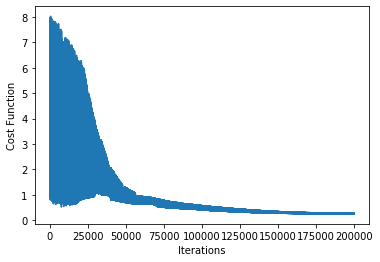

In [268]:
#Running the model
W = [1,1,1]
#Optimized theta and minimum cost
theta, min_cost, J_history = gradient_descent(W,X,y)
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")

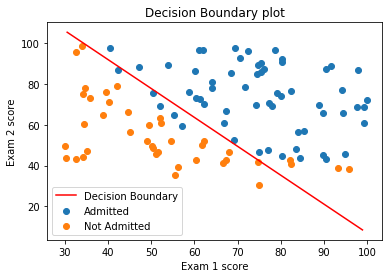

In [106]:
plt.scatter(X[pos, 0], X[pos, 1],label = 'Admitted')
plt.scatter(X[neg, 0], X[neg, 1], label = 'Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
#Plotting the decision boundary
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] + theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r",label='Decision Boundary')
plt.title('Decision Boundary plot')
plt.legend()

We can clearly see the two distinctions. Now we predict the accuracy of the model on the training set.

Evaluating the model Method 1:
See how well the learned model predicts on our training set.

In [136]:
#Predicting y from our predicting_y function

y_pred = predicting_y(W,X)
y_pred = list(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
y_pred = np.array(y_pred)

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

#Visualizing y_pred and y_true values side by side
print('----------------------------------------------')
print("\nVisualizing predicted and original y values in a dataframe: ")

df3 = pd.DataFrame(y_pred,columns=['y_pred'])
y_true = list(y)
for i in range(len(y)):
    y_true[i] = int(y_true[i])
df3['y_true'] = y_true 

print(df3)


----------------------------------------------

Visualizing predicted and original y values in a dataframe: 
    y_pred  y_true
0        0       0
1        0       0
2        0       0
3        1       1
4        1       1
5        0       0
6        1       1
7        1       1
8        1       1
9        1       1
10       1       0
11       0       0
12       1       1
13       1       1
14       0       0
15       1       1
16       1       1
17       0       0
18       1       1
19       1       1
20       0       0
21       1       1
22       0       0
23       0       0
24       1       1
25       1       1
26       1       1
27       1       0
28       0       0
29       0       0
30       1       1
31       1       1
32       0       0
33       0       1
34       0       0
35       0       0
36       0       0
37       1       1
38       0       0
39       0       0
40       1       1
41       0       0
42       1       1
43       1       0
44       0       0
45       0       

We can see that most of the admission decisions are predicted correctly.
Lets compute the accuracy of the model on the training set

In [137]:
#Calculating accuracy score using sklearn
from sklearn.metrics import accuracy_score 
print('----------------------------------------------')
print ("Accuracy Score from sklearn: ", accuracy_score(y, y_pred))

----------------------------------------------
Accuracy Score from sklearn:  0.91


90 out of 99 admission decisions were predicted correctly

In [138]:
X_test = np.array([[45,85]])
print("Probability of admission: ",predicting_y(theta,X_test)[0])

Probability of admission:  0.5033843876185621


#### Method 2: scipy.optimize

We wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. Now, instead of taking gradient descent steps, we will use the scipy.optimize module. 

SciPy is a numerical computing library for python. It provides an optimization module for root finding and minimization. As of scipy 1.0, the function scipy.optimize.minimize is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, we want to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, we are going to use optimize.minimize to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). We will pass to optimize.minimize the following inputs:

  costFunction: A cost function that, when given the training set and a particular $\theta$, computes the               logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that   we only pass the name of the function without the parenthesis. This indicates that we are only providing a           reference to this function, and not evaluating the result from this function.

  initial_theta: The initial values of the parameters we are trying to optimize.
  (X, y): These are additional arguments to the cost function.
    
  jac: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
    
  method: Optimization method/algorithm to use
    
  options: Additional options which might be specific to the specific optimization method. In the following, we only   tell the algorithm the maximum number of iterations before it terminates.
   
If you have completed the costFunction correctly, optimize.minimize will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using optimize.minimize, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by optimize.minimize: you only needed to provide a function calculating the cost and the gradient.

In [151]:

# Add intercept term to X
n = X.shape[1]
#print(X)

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)  #run this once only

#print(X)

#Cost Function method 2 
#Easier implementation and is compatible with scipy.optimize module
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = list(np.zeros(theta.shape))

    h = sigmoid(np.dot(X,theta))
    
    J = (1/m) * sum(-y * np.log(h) - (1-y) * np.log(1-h))
    
    for i in range(len(grad)):
        grad[i] = (1/m) * sum((h - y) * X[:,i]) 
        
    grad = np.array(grad)
    return J, grad


# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


See documention for scipy's optimize.minimize  for description about the different parameters
The function returns an object 'OptimizeResult'
We use truncated Newton algorithm for optimization which is equivalent to MATLAB's fminunc
See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy

In [152]:
# set options for optimize.minimize
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of 'OptimizeResult' object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta: ')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')


Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta: 
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Evaluating the model Method 2:

Another way to evaluate the quality of the parameters we have found is to see the probabaility of a student getting admission in the university given his marks.

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776. 

In [153]:
theta = np.array([-25.161, 0.206, 0.201])
prob = sigmoid(np.dot([1, 45, 85], theta))
print("Probability of admission: ",prob)

Probability of admission:  0.7674556976060447


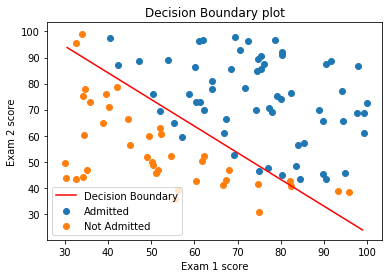

In [156]:
#Note that X now has a ones column appended to it
plt.scatter(X[pos, 1], X[pos, 2],label = 'Admitted')
plt.scatter(X[neg, 1], X[neg, 2], label = 'Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
#Plotting the decision boundary
x_value= np.array([np.min(X[:,2]),np.max(X[:,2])])
y_value=-(theta[0] + theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r",label='Decision Boundary')
plt.title('Decision Boundary plot')
plt.legend()

In [163]:
#Revert X back to original(having no ones column)
y_pred2 = predicting_y(theta,X)
y_pred2 = list(y_pred2)
for i in range(len(y_pred2)):
    if y_pred2[i] > 0.5:
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
y_pred2 = np.array(y_pred2)
#Calculating accuracy score using sklearn
from sklearn.metrics import accuracy_score 
print('----------------------------------------------')
print ("Accuracy Score from sklearn: ", accuracy_score(y, y_pred2))

----------------------------------------------
Accuracy Score from sklearn:  0.9


The second model has an accuracy score of 0.9 on the training set and slightly different theta. 
We can safely say that both the gradient descent method and scipy.optimize module have produced 
similar results with minimal differences, hence any model can be used to predict future decisions.

# Programming Exercise 2: Regularized Logistic Regression

Implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

The file ex2data2.txt contains the dataset for this problem. The first column is the result of test 1 and the second column represents the result of test 2. The third column tells whether the microchip sample was accepted or rejected. 

Load the Dataset

In [241]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
path = '/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise2/Data/ex2data2.txt'
data = np.loadtxt(path , delimiter=',')
X, y = data[:, 0:2], data[:, 2]
m = y.size  # number of training example

Visualizing the dataset

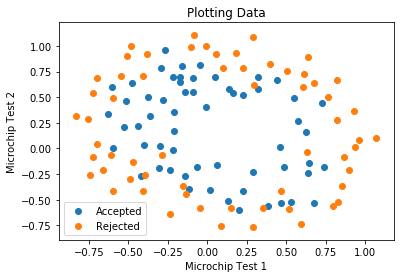

In [211]:
pos = y == 1
neg = y == 0

plt.scatter(X[pos,0], X[pos,1],label = 'Accepted')
plt.scatter(X[neg,0], X[neg,1],label = 'Rejected')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plotting Data')
plt.legend()
plt.show()

#### Feature mapping
    
One way to fit the data better is to create more features from each data point.
In the function mapFeature function, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

     mapFeature(x)=[1 x1 x2 x1^2 x1x2 x2^2 x1^3… x1x2^5 x2^6]Transpose

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. 
     
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also 
see for yourself how regularization can help combat the overfitting problem.

In [212]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)
    

In [261]:
#print("\n\nmapFeature degree parameter = 6\n\n")
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:, 0], X[:, 1],6)
n = X.shape[1]

Now we will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function costFunctionReg below to return the cost and gradient.

The regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$
Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [264]:
def compute_RegularizedCost(theta,X,y,lambda_=1):
    
    h = sigmoid(X @ theta)
    J = 0
    J += (1/m) * sum(-y * np.log(h) - (1-y) * np.log(1-h)) + (lambda_ / (2 * m)) * sum(np.square(theta))
    
    grad = [0] * (n)
    grad[0] = (1/m) * sum((h - y) * X[:,0])
    for i in range(1,n):
        grad[i] = (1/m) * sum((h - y) * X[:,i]) + (lambda_ / m) * theta[i]
    
    return  J, np.array(grad)


Testing a few values

In [219]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = compute_RegularizedCost(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[%.4f, %.4f, %.4f, %.4f, %.4f]' % (grad[0],grad[1],grad[2],grad[3],grad[4]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = compute_RegularizedCost(test_theta, X, y,10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta (ones) - first five values only:')
print('\t[%.4f, %.4f, %.4f, %.4f, %.4f]' % (grad[0],grad[1],grad[2],grad[3],grad[4]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.21
Expected cost (approx): 3.16

Gradient at test theta (ones) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


#### Method 1: Gradient Descent

In [230]:
def gradientDescent(X,y,theta,alpha=1,num_iters=2000,Lambda=1):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    J_history = []
    
    for i in range(num_iters):
        cost, grad = compute_RegularizedCost(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history, min(J_history)

Predict the y value given X and theta

In [231]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

Post gradient descent results

Minimum cost:  0.5358002433329203
Final Theta: 
 [ 1.27273951  0.6252718   1.18108869 -2.01996087 -0.91742376 -1.43166445
  0.12400634 -0.36553439 -0.35723963 -0.17513048 -1.45815646 -0.05098906
 -0.61555504 -0.27470631 -1.19281652 -0.24218823 -0.20600608 -0.04473074
 -0.27778449 -0.2953781  -0.45635749 -1.04320249  0.02777172 -0.2924313
  0.01556683 -0.32737957 -0.14388692 -0.92465257]


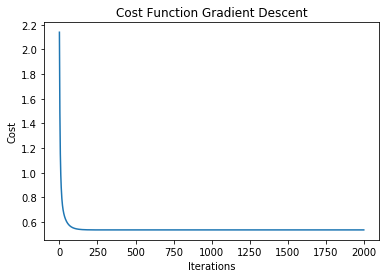

In [234]:
theta_final, cost_history, min_cost = gradientDescent(X,y,test_theta)
print("Minimum cost: ",min_cost)
print("Final Theta: \n", theta_final)

#Visulaizing cost function
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.title("Cost Function Gradient Descent")
plt.show()

Predict the model accuracy on the training set

In [233]:
p = classifierPredict(theta_final,X)
print("\n-------------------------------------------------")
print("Train Accuracy of the model:", (sum(p==y)/len(y) *100),"%")
print("-------------------------------------------------")



-------------------------------------------------
Train Accuracy of the model: 83.05084745762711 %
-------------------------------------------------


#### Plotting the Decision Boundary
To visualize the model learned by this classifier, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and draw a contour plot where the predictions change from y = 0 to y = 1.

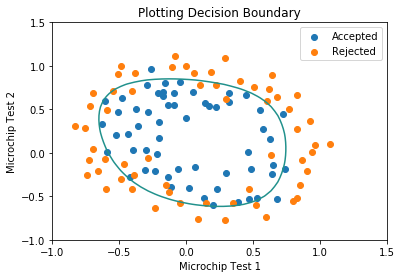

In [266]:
X, y = data[:, 0:2], data[:, 2]
#Scatter plot of data points
plt.scatter(X[pos,0], X[pos,1],label = 'Accepted')
plt.scatter(X[neg,0], X[neg,1],label = 'Rejected')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plotting Decision Boundary')
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeature(u_vals[i],v_vals[j],6) @ theta_final
plt.contour(u_vals,v_vals,z.T,0)
plt.legend()

#### Method 2: scipy.optimize

In [262]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost J of a particular choice of theta.
    Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    
    h = sigmoid(X @ theta)
    J = 0
    J += (1/m) * sum(-y * np.log(h) - (1-y) * np.log(1-h)) + (lambda_ / (2 * m)) * sum(np.square(theta))
    
    grad = [0] * (n)
    grad[0] = (1/m) * sum((h - y) * X[:,0])
    for i in range(1,n):
        grad[i] = (1/m) * sum((h - y) * X[:,i]) + (lambda_ / m) * theta[i]
    
    return  J, np.array(grad)


# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

print("Final theta: ",theta)

Final theta:  [ 1.25441474  0.62276759  1.19242754 -2.00505509 -0.87290722 -1.3618429
  0.12573875 -0.35536852 -0.3560363  -0.1709633  -1.45784682 -0.06683325
 -0.61498636 -0.25080289 -1.18096023 -0.22566833 -0.20562889 -0.06382328
 -0.27187028 -0.27658988 -0.46836013 -1.03247362  0.01627587 -0.29695277
  0.00581073 -0.32631635 -0.12073387 -0.93022963]


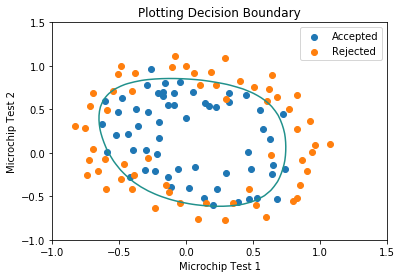

In [260]:
X, y = data[:, 0:2], data[:, 2]
#Scatter plot of data points
plt.scatter(X[pos,0], X[pos,1],label = 'Accepted')
plt.scatter(X[neg,0], X[neg,1],label = 'Rejected')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plotting Decision Boundary')
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeature(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)
plt.legend()

#print(theta)

In [259]:
# Compute accuracy on our training set
p = classifierPredict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



Feel free to manipulate the regularization constant lambda_ and the degree of mapFeature to see if we can better fit the decision boundary to separate the data points